In [20]:
import pandas as pd
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
%cd ~/thesis
from data_prep.topic_modeling.process_articles import *

articles = load_articles()

articles.head()

/Users/jakeunderland/thesis


,date,title,text,publication
0,2020-01-17,新型肺炎：神奈川の男性、新型肺炎 国内初確認 武漢渡航、既に退院,厚生労働省は１６日、中国の武漢市に滞在歴のある神奈川県在住の３０代男性が肺炎の症状を起こし...,mainichi
1,2020-01-21,新型肺炎：新型肺炎 ヒトからヒト確認 中国で死者３人、感染２００人超,中国湖北省武漢市の衛生当局は２０日、２０１９年末から集団感染の広がる新型コロナウイルスによ...,mainichi
2,2020-01-21,ヒトからヒトへ、新型肺炎が感染 中国明言,中国中部の湖北省武漢市で集団発生している新型コロナウイルスによる肺炎をめぐり、中国政府の専門...,asahi
3,2020-01-22,新型肺炎 出入り制限 中国・武漢 人から人 感染確認 死者６人に,【上海＝南部さやか】中国湖北省武漢市を中心に多発する新型コロナウイルスによる肺炎で、武漢市...,yomiuri
4,2020-01-22,新型肺炎：新型肺炎 上海から入国も体調申告を要請 政府対応強化,政府は２１日、対策を協議する関係閣僚会議を開いた。武漢に加え、上海からの入国者に、体調や薬...,mainichi


In [ ]:
# preprocess data for topic modeling 

# get rid of ubiquitous terms 
articles_cleaned = articles.replace("新型コロナ", "")
articles_cleaned = articles_cleaned.replace("新型肺炎", "")

In [5]:
docs = list(articles["title"])

# non stochastic behavior 
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

model = topic_modeling_bert(docs, umap_model)

model.doc_info

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2023-01-28 14:03:29,402 - BERTopic - Transformed documents to Embeddings
2023-01-28 14:03:34,689 - BERTopic - Reduced dimensionality
2023-01-28 14:03:34,785 - BERTopic - Clustered reduced embeddings


,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,新型肺炎：神奈川の男性、新型肺炎 国内初確認 武漢渡航、既に退院,1,1_新型肺炎_クルーズ船_厚労相_北海道,新型肺炎 - クルーズ船 - 厚労相 - 北海道 - 国内初の死者 - 政府 - 首相 - ...,1.000000,True
1,新型肺炎：新型肺炎 ヒトからヒト確認 中国で死者３人、感染２００人超,13,13_中国_新型肺炎_武漢_海外団体旅行禁止,中国 - 新型肺炎 - 武漢 - 海外団体旅行禁止 - 拡大 - 新型肺炎対策で - 政府対...,0.493337,False
2,ヒトからヒトへ、新型肺炎が感染 中国明言,13,13_中国_新型肺炎_武漢_海外団体旅行禁止,中国 - 新型肺炎 - 武漢 - 海外団体旅行禁止 - 拡大 - 新型肺炎対策で - 政府対...,1.000000,True
3,新型肺炎 出入り制限 中国・武漢 人から人 感染確認 死者６人に,13,13_中国_新型肺炎_武漢_海外団体旅行禁止,中国 - 新型肺炎 - 武漢 - 海外団体旅行禁止 - 拡大 - 新型肺炎対策で - 政府対...,0.076048,False
4,新型肺炎：新型肺炎 上海から入国も体調申告を要請 政府対応強化,13,13_中国_新型肺炎_武漢_海外団体旅行禁止,中国 - 新型肺炎 - 武漢 - 海外団体旅行禁止 - 拡大 - 新型肺炎対策で - 政府対...,0.796718,False
...,...,...,...,...,...,...
2018,遠山元公明議員、在宅起訴 コロナ融資など仲介 無登録で１１１件,-1,-1_新型コロナ_政府_首相_トランプ氏,新型コロナ - 政府 - 首相 - トランプ氏 - その１ - コロナの先の２０３０ - 札...,0.750081,False
2019,新型コロナ：新型コロナ 「オミクロン株、急拡大も」 専門家組織、対策呼びかけ,-1,-1_新型コロナ_政府_首相_トランプ氏,新型コロナ - 政府 - 首相 - トランプ氏 - その１ - コロナの先の２０３０ - 札...,0.703851,False
2020,新型コロナ：新型コロナ 首相「先手対応」,11,11_首相_自民党総裁選_菅首相_特措法,首相 - 自民党総裁選 - 菅首相 - 特措法 - 菅首相退陣 - 総裁選 - コロナ - ...,0.211696,False
2021,世界の感染最多、９３万人、１カ月で６割増、死者数は横ばい。,2,2_感染_新型コロナ_コロナ感染_変異種,感染 - 新型コロナ - コロナ感染 - 変異種 - 国内感染 - 感染爆発 - 国内初確認...,0.269458,False


In [6]:
model.model.get_topic_info()

,Topic,Count,Name
0,-1,449,-1_新型コロナ_政府_首相_トランプ氏
1,0,144,0_コロナワクチン_ワクチン_ワクチン接種_大規模接種
2,1,140,1_新型肺炎_クルーズ船_厚労相_北海道
3,2,128,2_感染_新型コロナ_コロナ感染_変異種
4,3,121,3_東京_新型コロナ_新規感染_首都圏３県
5,4,118,4_新型肺炎_天声人語_寄稿_地球を読む
6,5,109,5_専門家会議_新型コロナ_厚労省_自宅療養
7,6,90,6_緊急事態宣言_緊急事態_新型コロナ_愛知
8,7,76,7_日銀_閣議決定_過去最大_コロナ対応
9,8,65,8_６月_基準地価_ｇｄｐ_３月


In [7]:
model.topic_features


{-1: [('新型コロナ', 0.026200423437831303),
  ('政府', 0.022867067333110568),
  ('首相', 0.019169144552654276),
  ('トランプ氏', 0.01743019839061316),
  ('その１', 0.012361672312181096),
  ('コロナの先の２０３０', 0.01146075258099834),
  ('札幌', 0.01146075258099834),
  ('共生のｓｄｇｓ', 0.01110478438024715),
  ('ｇｏｔｏ', 0.01110478438024715),
  ('五輪', 0.010521966511412186)],
 0: [('コロナワクチン', 0.10689661099982668),
  ('ワクチン', 0.06323595353779013),
  ('ワクチン接種', 0.044220238470509265),
  ('大規模接種', 0.04208619962597869),
  ('新型コロナ', 0.038021569739042874),
  ('３回目接種', 0.034976308401528385),
  ('職域接種', 0.034976308401528385),
  ('接種', 0.022863306733371974),
  ('ファイザー製', 0.022863306733371974),
  ('３回目', 0.018263254607524714)],
 1: [('新型肺炎', 0.20485215740933593),
  ('クルーズ船', 0.0517883600085045),
  ('厚労相', 0.0311886313465996),
  ('北海道', 0.02529001588622583),
  ('国内初の死者', 0.02193310796665056),
  ('政府', 0.019047090898943332),
  ('首相', 0.01696484339334199),
  ('厚労省', 0.016124983167089282),
  ('東証', 0.0158851662739896),
  ('瀬戸際', 0.01588

In [8]:
# visualize topics

model.model.visualize_topics()

In [9]:
model.model.visualize_hierarchy()

In [10]:
model.model.visualize_heatmap()

In [11]:
model.model.get_representative_docs(model.model.find_topics('不安')[0][0])

['新型コロナ：新型コロナ\u3000首相、ＧｏＴｏ見直し慎重\u3000緊急事態再発令にも\u3000国内感染、最多１７０９人',
 '分科会、抜本的対策迫る\u3000県境越え自粛など\u3000感染拡大続く地域\u3000新型コロナ',
 '新型コロナ\u3000首相「ＧｏＴｏ」継続強調\u3000感染１７０５人、２日連続最多']

In [12]:
topics_over_time = model.model.topics_over_time(docs=docs, 
                                                # topics=model.topics, 
                                                timestamps=articles["date"], 
                                                global_tuning=True, 
                                                evolution_tuning=True, 
                                                nr_bins=24)

24it [00:00, 78.51it/s]


In [13]:
model.model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [27]:
model.model.visualize_barchart()

In [29]:
model.model.visualize_documents(docs)

In [14]:
model.model.get_params()

{'calculate_probabilities': True,
 'ctfidf_model': ClassTfidfTransformer(),
 'diversity': None,
 'embedding_model': <bertopic.backend._sentencetransformers.SentenceTransformerBackend at 0x151e62650>,
 'hdbscan_model': HDBSCAN(min_cluster_size=10, prediction_data=True),
 'language': 'japanese',
 'low_memory': False,
 'min_topic_size': 10,
 'n_gram_range': (1, 1),
 'nr_topics': None,
 'seed_topic_list': None,
 'top_n_words': 10,
 'umap_model': UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.0, n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}),
 'vectorizer_model': CountVectorizer(),
 'verbose': True}

In [15]:
articles["topic"] = model.topics
articles.head()

,date,title,text,publication,topic
0,2020-01-17,新型肺炎：神奈川の男性、新型肺炎 国内初確認 武漢渡航、既に退院,厚生労働省は１６日、中国の武漢市に滞在歴のある神奈川県在住の３０代男性が肺炎の症状を起こし...,mainichi,1
1,2020-01-21,新型肺炎：新型肺炎 ヒトからヒト確認 中国で死者３人、感染２００人超,中国湖北省武漢市の衛生当局は２０日、２０１９年末から集団感染の広がる新型コロナウイルスによ...,mainichi,13
2,2020-01-21,ヒトからヒトへ、新型肺炎が感染 中国明言,中国中部の湖北省武漢市で集団発生している新型コロナウイルスによる肺炎をめぐり、中国政府の専門...,asahi,13
3,2020-01-22,新型肺炎 出入り制限 中国・武漢 人から人 感染確認 死者６人に,【上海＝南部さやか】中国湖北省武漢市を中心に多発する新型コロナウイルスによる肺炎で、武漢市...,yomiuri,13
4,2020-01-22,新型肺炎：新型肺炎 上海から入国も体調申告を要請 政府対応強化,政府は２１日、対策を協議する関係閣僚会議を開いた。武漢に加え、上海からの入国者に、体調や薬...,mainichi,13


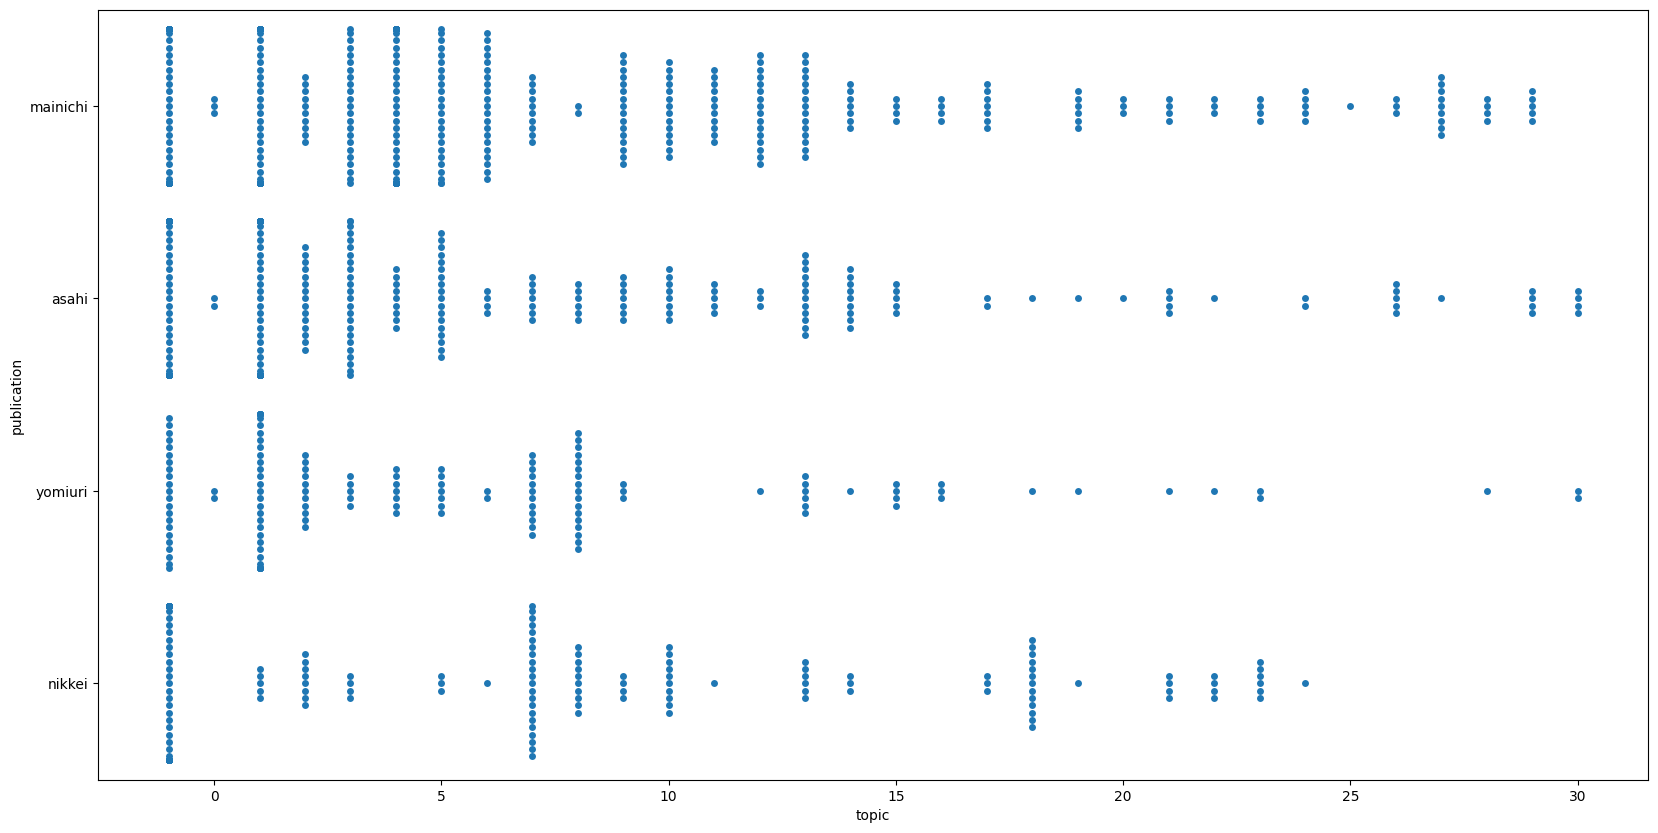

In [16]:
mini_df = articles.iloc[:1000]

fig = plt.figure(figsize=(20,10))
ax = sns.swarmplot(data=mini_df, x='topic', y='publication');


In [31]:
##############################
## Analysis with preprocessing 
##############################

docs = articles["title"] + articles["text"]

docs_preprocessed = make_lda_docs(docs)

print(docs_preprocessed[:5])


NameError: name 'make_lda_docs' is not defined